In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
path = "Z:\\Sasindu\\Data set\\Insurance_claims.csv"
data = pd.read_csv(path)

In [3]:
df = pd.DataFrame(data)

In [4]:
df.head()

,policy_id,subscription_length,vehicle_age,customer_age,region_code,region_density,segment,model,fuel_type,max_torque,...,is_brake_assist,is_power_door_locks,is_central_locking,is_power_steering,is_driver_seat_height_adjustable,is_day_night_rear_view_mirror,is_ecw,is_speed_alert,ncap_rating,claim_status
0,POL045360,9.3,1.2,41,C8,8794,C2,M4,Diesel,250Nm@2750rpm,...,Yes,Yes,Yes,Yes,Yes,No,Yes,Yes,3,0
1,POL016745,8.2,1.8,35,C2,27003,C1,M9,Diesel,200Nm@1750rpm,...,No,Yes,Yes,Yes,Yes,Yes,Yes,Yes,4,0
2,POL007194,9.5,0.2,44,C8,8794,C2,M4,Diesel,250Nm@2750rpm,...,Yes,Yes,Yes,Yes,Yes,No,Yes,Yes,3,0
3,POL018146,5.2,0.4,44,C10,73430,A,M1,CNG,60Nm@3500rpm,...,No,No,No,Yes,No,No,No,Yes,0,0
4,POL049011,10.1,1.0,56,C13,5410,B2,M5,Diesel,200Nm@3000rpm,...,No,Yes,Yes,Yes,No,No,Yes,Yes,5,0


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 58592 entries, 0 to 58591
Data columns (total 41 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   policy_id                         58592 non-null  object 
 1   subscription_length               58592 non-null  float64
 2   vehicle_age                       58592 non-null  float64
 3   customer_age                      58592 non-null  int64  
 4   region_code                       58592 non-null  object 
 5   region_density                    58592 non-null  int64  
 6   segment                           58592 non-null  object 
 7   model                             58592 non-null  object 
 8   fuel_type                         58592 non-null  object 
 9   max_torque                        58592 non-null  object 
 10  max_power                         58592 non-null  object 
 11  engine_type                       58592 non-null  object 
 12  airb

###### policy_id: Unique identifier for the insurance policy.
###### subscription_length: The duration for which the insurance policy is active.
###### customer_age: Age of the insurance policyholder, which can influence the likelihood of claims.
###### vehicle_age: Age of the vehicle insured, which may affect the probability of claims due to factors like wear and tear.
###### model: The model of the vehicle, which could impact the claim frequency due to model-specific characteristics.
###### fuel_type: Type of fuel the vehicle uses (e.g., Petrol, Diesel, CNG), which might influence the risk profile and claim likelihood.
###### max_torque, max_power: Engine performance characteristics that could relate to the vehicle’s mechanical condition and claim risks.
###### engine_type: The type of engine, which might have implications for maintenance and claim rates.
###### displacement, cylinder: Specifications related to the engine size and construction, affecting the vehicle’s performance and potentially its claim history.
###### region_code: The code representing the geographical region of the policyholder, as claim patterns can vary regionally.
###### region_density: Population density of the policyholder’s region, which could correlate with accident and claim frequencies.
###### airbags: The number of airbags in the vehicle, indicating safety level which can influence claim probability.
###### is_esc (Electronic Stability Control), is_adjustable_steering, is_tpms (Tire Pressure Monitoring System): Features that enhance vehicle safety and could potentially reduce the likelihood of claims.
###### is_parking_sensors, is_parking_camera: Parking aids that might affect the probability of making a claim, especially in urban areas.
###### rear_brakes_type: Type of rear brakes, which could be related to the vehicle’s stopping capability and safety.
###### Features like steering_type, turning_radius, length, width, gross_weight, and various other binary indicators (Yes/No) for specific vehicle amenities and safety features, which together build a profile of the vehicle’s characteristics and its associated risk factors.
###### claim_status: Indicates whether a claim was made (1) or not (0), which is the dependent variable the model aims to predict.

In [6]:
df.isnull().sum()

policy_id                           0
subscription_length                 0
vehicle_age                         0
customer_age                        0
region_code                         0
region_density                      0
segment                             0
model                               0
fuel_type                           0
max_torque                          0
max_power                           0
engine_type                         0
airbags                             0
is_esc                              0
is_adjustable_steering              0
is_tpms                             0
is_parking_sensors                  0
is_parking_camera                   0
rear_brakes_type                    0
displacement                        0
cylinder                            0
transmission_type                   0
steering_type                       0
turning_radius                      0
length                              0
width                               0
gross_weight

In [8]:
counts = df['claim_status'].value_counts()

In [9]:
print(counts)

claim_status
0    54844
1     3748
Name: count, dtype: int64


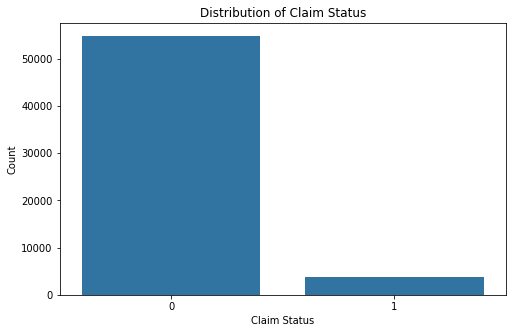

In [12]:
plt.figure(figsize=(8, 5))
sns.countplot(x='claim_status', data=df)
plt.title('Distribution of Claim Status')
plt.xlabel('Claim Status')
plt.ylabel('Count')
plt.show()

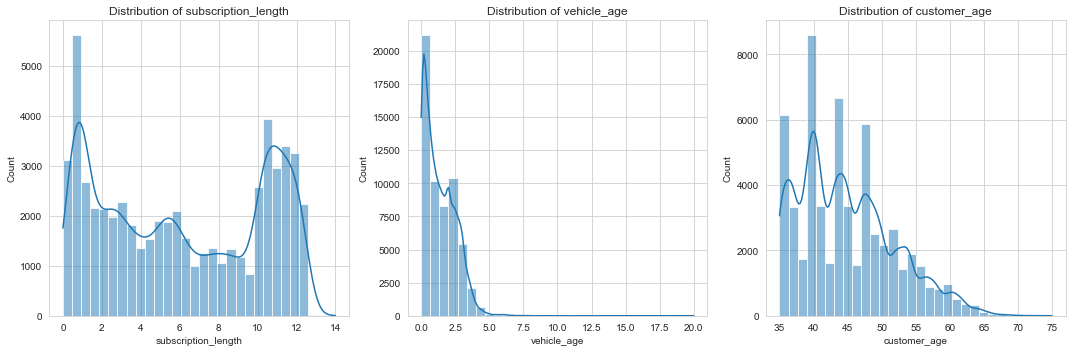

In [13]:
sns.set_style("whitegrid")

numerical_columns = ['subscription_length','vehicle_age','customer_age']

plt.figure(figsize=(15,5))
for i,column in enumerate(numerical_columns, 1):
    plt.subplot(1,3,i)
    sns.histplot(df[column], bins=30, kde = True)
    plt.title(f'Distribution of {column}')

plt.tight_layout()
plt.show()

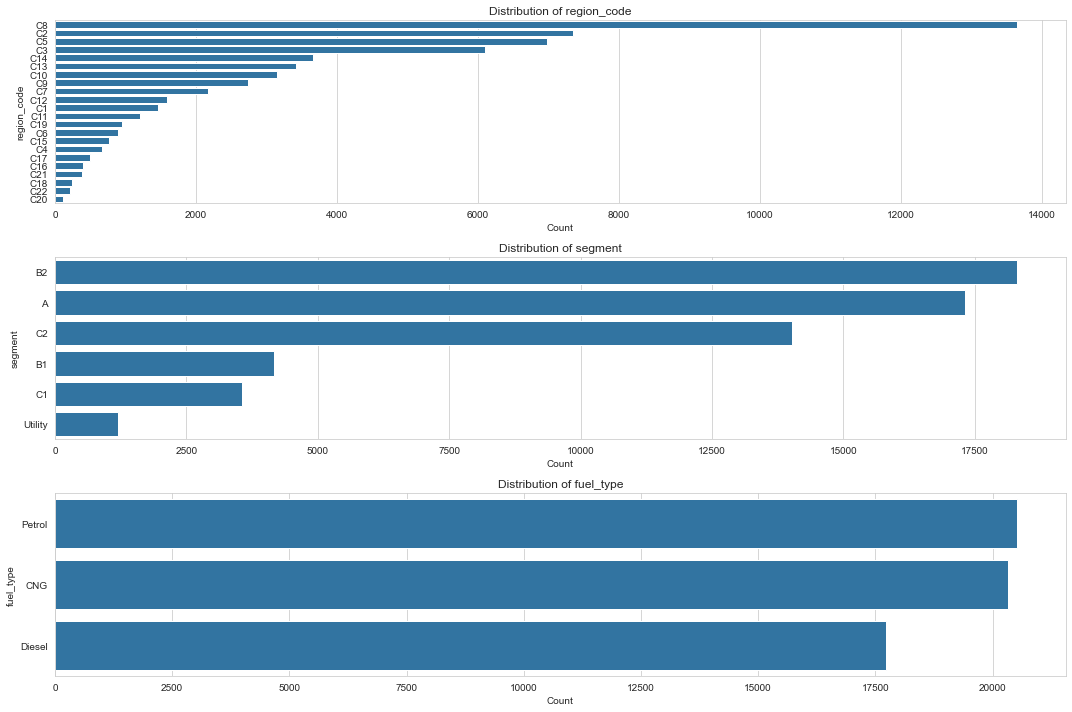

In [14]:
categorical_columns = ['region_code','segment','fuel_type']

plt.figure(figsize=(15,10))
for  i,column in enumerate(categorical_columns,1):
    plt.subplot(3,1,i)
    sns.countplot(y = column, data = df, order = df[column].value_counts().index)
    plt.title(f'Distribution of {column}')
    plt.xlabel('Count')
    plt.ylabel(column)

plt.tight_layout()
plt.show()

## Handling Class Imbalance

In [15]:
from sklearn.utils import resample

In [18]:
# separate majority and minority classes
majority = df[df.claim_status == 0]
minority = df[df.claim_status == 1]

In [19]:
# Oversample the minority class

minority_oversampled = resample(minority,
                               replace= True,
                               n_samples =len(majority),
                               random_state=42)

In [20]:
#combine majority class with oversampled minority class
oversampled_data = pd.concat([majority,minority_oversampled])

In [21]:
# check the distribution of undersampled and oversampled datasets
oversampled_distribution = oversampled_data.claim_status.value_counts()

oversampled_distribution

claim_status
0    54844
1    54844
Name: count, dtype: int64

## EDA after Class Imbalance

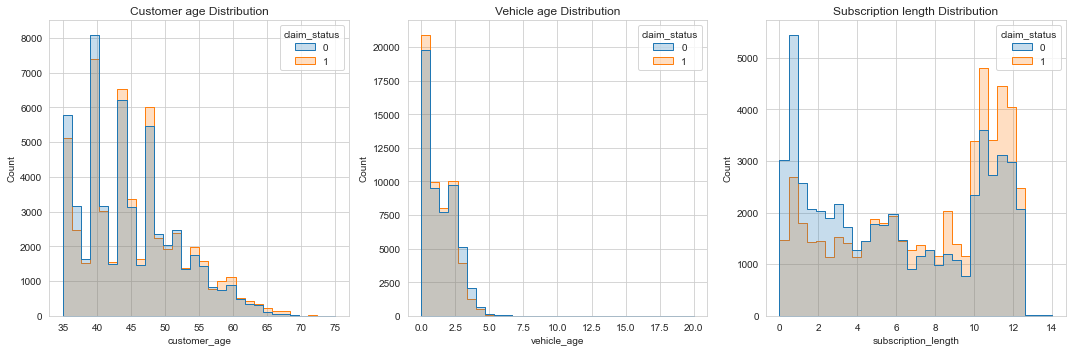

In [24]:
# plotting the distribution of "customer_age","Vehicle_age" and "Subcription _lenght" with respect to "claim_status".
plt.figure(figsize=(15, 5))

# 'Customer_age' distributuion
plt.subplot(1,3,1)
sns.histplot(data = oversampled_data, x = "customer_age", hue ='claim_status', element ='step', bins=30)
plt.title('Customer age Distribution')

# 'vehicle_age' distributuion
plt.subplot(1,3,2)
sns.histplot(data = oversampled_data, x = "vehicle_age", hue ='claim_status', element ='step', bins=30)
plt.title('Vehicle age Distribution')

# 'subscription_length' distributuion
plt.subplot(1,3,3)
sns.histplot(data = oversampled_data, x = "subscription_length", hue ='claim_status', element ='step', bins=30)
plt.title('Subscription length Distribution')

plt.tight_layout()
plt.show()

## Feature Selection

In [25]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import LabelEncoder

In [28]:
# encode categorical variables
le = LabelEncoder()
encoded_data = data.apply(lambda col: le.fit_transform(col) if col.dtype == 'object' else col)

In [29]:
# separate features and target variable
x = encoded_data.drop('claim_status',axis =1)
y = encoded_data['claim_status']

In [30]:
# create a random forest classifier model
rf_model = RandomForestClassifier(random_state = 42)
rf_model.fit(x,y)

RandomForestClassifier(random_state=42)

In [31]:
# get feature importance
feature_importance = rf_model.feature_importances_

In [34]:
feature_df = pd.DataFrame({'Feature':x.columns,'Importance':feature_importance})
feature_df = feature_df.sort_values(by = 'Importance', ascending = False)

print(feature_df.head(10))

                Feature  Importance
0             policy_id    0.321072
1   subscription_length    0.248309
3          customer_age    0.176639
2           vehicle_age    0.135190
5        region_density    0.053838
4           region_code    0.052649
7                 model    0.000957
24               length    0.000846
26         gross_weight    0.000834
11          engine_type    0.000791


In [35]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, accuracy_score
from sklearn.ensemble import RandomForestClassifier

In [36]:
oversampled_data = oversampled_data.drop('policy_id',axis=1)

In [37]:
x_oversampled_data = oversampled_data.drop('claim_status',axis = 1)
y_oversampled_data = oversampled_data['claim_status']

In [38]:
x_oversampled_encoded = x_oversampled_data.apply(lambda col: le.fit_transform(col) if col.dtype == 'object' else col)

In [39]:
x_train,x_test,y_train,y_test = train_test_split(x_oversampled_encoded,y_oversampled_data,test_size = 0.3,random_state = 42)

In [40]:
rf_model_oversampled = RandomForestClassifier(random_state = 42)
rf_model_oversampled.fit(x_train,y_train)

RandomForestClassifier(random_state=42)

In [42]:
y_pred = rf_model_oversampled.predict(x_test)

In [43]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       1.00      0.96      0.98     16574
           1       0.96      1.00      0.98     16333

    accuracy                           0.98     32907
   macro avg       0.98      0.98      0.98     32907
weighted avg       0.98      0.98      0.98     32907



In [47]:
original_encoded = data.drop('policy_id', axis=1).copy()
encoders = {col: LabelEncoder().fit(x_oversampled_data[col]) for col in x_oversampled_data.select_dtypes(include=['object']).columns}

for col in original_encoded.select_dtypes(include=['object']).columns:
    if col in encoders:
        original_encoded[col] = encoders[col].transform(original_encoded[col])

original_encoded_predictions = rf_model_oversampled.predict(original_encoded.drop('claim_status', axis=1))

comparison_df = pd.DataFrame({
    'Actual': original_encoded['claim_status'],
    'Predicted': original_encoded_predictions
})

print(comparison_df.head(10))

   Actual  Predicted
0       0          0
1       0          0
2       0          0
3       0          1
4       0          0
5       0          0
6       0          0
7       0          0
8       0          0
9       0          0


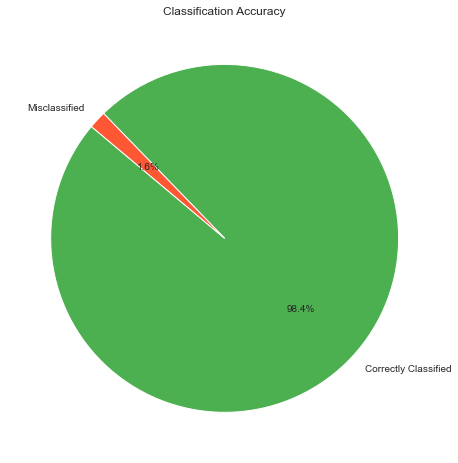

In [48]:
correctly_classified = (comparison_df['Actual'] == comparison_df['Predicted']).sum()
incorrectly_classified = (comparison_df['Actual'] != comparison_df['Predicted']).sum()

classification_counts = [correctly_classified, incorrectly_classified]
labels = ['Correctly Classified', 'Misclassified']

# create a pie chart
plt.figure(figsize=(8, 8))
plt.pie(classification_counts, labels=labels, autopct='%1.1f%%', startangle=140, colors=['#4CAF50', '#FF5733'])
plt.title('Classification Accuracy')
plt.show()